## Alessandro Bianchetti

## Exercise 7

Consider a bivariate Gaussian distribution N($\mu$,$\Sigma$), where $\mu$ = (4, 2),
$\Sigma_{11}$ = 1.44, $\Sigma_{22}$ = 0.81, $\Sigma_{12}$ = $\Sigma_{12}$ = −0.702. Assume that such distribution
describes the posterior of two parameters $X_1$ and $X_2$. Plot contours
of this distribution and tell what are the boundaries of the 95\% credibile
interval for each parameter, after marginalizing over the other. Tell how
these boundaries change if, instead of marginalizing, we fix either parameter
to a known value. Now, re-obtain the same boundaries via Monte
Carlo sampling of the posterior, in three ways: a) by directly drawing values
of ($X_1$,$X_2$), by mean of a a Cholesky decomposition of the covariance
(check in the literature how to do this); b) Via Metropolis-Hastings sampling
of the posterior, c) Via Gibbs sampling of the posterior. In all cases,
do not rely on pre-made code, but write your own (i.e., you can surely
use libraries to generate known distributions, do Cholesky decomposition,
and so on, but you should not use a pre-made library with a command like
”Gibbs-sampling”). In all cases, provide final contour plots, and marginalized
posteriors. In the MCMC analysis, produce also trace plots to test
for convergence of the chains. 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from numpy.random import random, seed
from scipy.stats import multivariate_normal as mvn
import scipy.integrate as integrate

#plt.rcParams['axes.xmargin'] = 0
#plt.rcParams['axes.ymargin'] = 0
%matplotlib inline

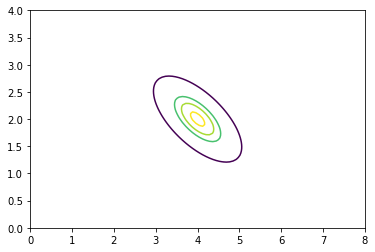

In [2]:
D = int(2)
x = np.random.rand(D)
mu = np.array([4,2],float)
cov = np.array([[1.44,-0.702],[-0.702,0.81]])
det = cov[0,0]*cov[1,1]-cov[0,1]**2
# random symmetric matrix
#cov = A.T.dot(A)

# Generate grid points
x, y = np.meshgrid(np.linspace(0,8,100),np.linspace(0,4,100))
xy = np.column_stack([x.flat, y.flat])

# density values at the grid points
z = mvn.pdf(xy, mu, cov).reshape(x.shape)

# arbitrary contour levels
max = 0.19371
contour_level = [0.68*max,0.9*max,0.95*max,0.99*max]

fig = plt.contour(x, y, z, levels = contour_level)
plt.show()

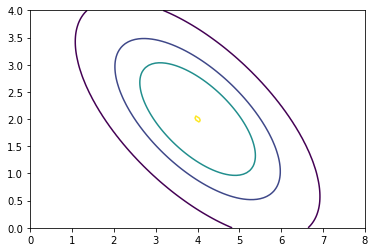

In [3]:
contour_level = [0.01,0.05,0.1,0.1935]

fig = plt.contour(x, y, z, levels = contour_level)
plt.show()


Firs step: we marginalize the original BVN over X to get the posterior for Y: we use scipy.quad to loop over that integral until we find the correct interval.


In [4]:
def funcy(y):
    c = 1./(np.sqrt(2*np.pi))*np.sqrt(det/cov[1,1])*np.e**(-0.5*(y-mu[1])**2*cov[0,0]/det + cov[0,1]**2/cov[1,1])
    return c

interval_y = [-1000, 1000]
Itot = integrate.quad(funcy, interval_y[0], interval_y[1], epsrel=1.e-14)
print(Itot)

eps=1.e-5
interval_y = [mu[1]-eps, mu[1]+eps]
I=[0,0]

alpha = Itot[0]*0.95
#print(alpha)
while(I[0]<alpha): 
    I = integrate.quad(funcy, interval_y[0], interval_y[1], epsrel=1.e-9)
    interval_y[0] -= eps
    interval_y[1] += eps
    #print(X1,X2)
    #print("ok")

print(I)
print(interval_y)

#I = integrate.quad(func, 3.99999, 4.00001, epsrel=1.2-14)
#print(I)

(1.1460419286179722, 3.6175566598378226e-10)
(1.0887399673551021, 1.1997757038481783e-11)
[0.6594899999949986, 3.340510000008782]


We repeat the same procedure for Y, thus getting the posterior for X and extracting the credibility interval in X.

In [5]:
def funcx(x):
    c = 1./(np.sqrt(2*np.pi))*np.sqrt(det/cov[0,0])*np.e**(-0.5*(x-mu[0])**2*cov[1,1]/det + cov[0,1]**2/cov[0,0])
    return c

interval_x = [-1000, 1000]
Itot = integrate.quad(funcx, interval_x[0], interval_x[1], epsrel=1.e-14)
print(Itot)
alpha = Itot[0]*0.95

eps=1.e-5
interval_x = [mu[0]-eps, mu[0]+eps]
I=[0,0]

while(I[0]<alpha): 
    I = integrate.quad(funcx, interval_x[0], interval_x[1], epsrel=1.e-9)
    interval_x[0] -= eps
    interval_x[1] += eps
    #print(X1,X2)
    #print("ok")

print(I)
print(interval_x)

(0.8782126128924519, 9.848225467762317e-09)
(0.8343020159159318, 9.187718572007952e-12)
[2.212699999988291, 5.787299999932337]


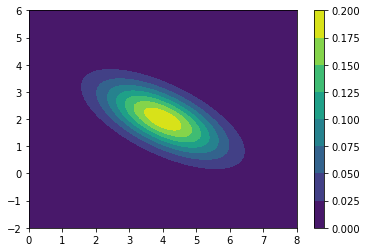

In [6]:
N = int(100)
xvec = np.linspace(0,8,N)
yvec = np.linspace(-2,6,N)
x, y = np.meshgrid(xvec,yvec)
#xy = np.column_stack([x.flat, y.flat])
xy = np.dstack((x, y))
rv = mvn(mu, cov)
z = rv.pdf(xy)

cs = plt.contourf(x, y, z, cmap="viridis")
cbar = plt.colorbar(cs, orientation="vertical")

#print(rv.pdf(xy))

plt.tight_layout
plt.show()

An alternative path could be projecting the above 2d histogram on either axis: that corresponds to the marginalization process. We would get a univariate Gaussian, for which we can calculate the credibility interval. We do this for y, then for x.

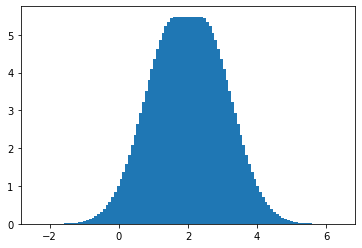

11.647284897986694 11.629809286567662
26 72
0.10101010101010122 3.8181818181818183


In [7]:
marg_post_y = np.zeros(N, float)
for i in range(N):
    for j in range(N):
        marg_post_y[i] += z[i,j]

plt.bar(yvec,marg_post_y)
plt.show()

bin_width = 8./100
I = sum(marg_post_y)*bin_width
alpha = 0.95*I 
peak = np.max(marg_post_y)
ind = np.argmax(marg_post_y)

ind1 = ind-1
ind2 = ind+1
I0=0
while(I0<alpha): 
    I0=0
    for j in range(ind1,ind2):
        I0 += marg_post_y[j]*bin_width
    ind1 -=1
    ind2 +=1
    
    

print(I0, alpha)
print(ind1,ind2)
print(yvec[ind1],yvec[ind2])
    

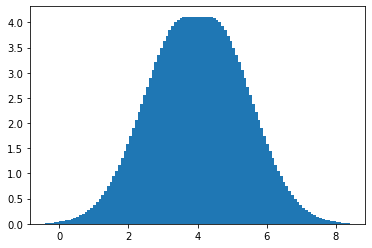

11.714663233091692 11.629809286567665
18 80
1.4545454545454546 6.464646464646465


In [8]:
marg_post_x = np.zeros(N, float)
for i in range(N):
    for j in range(N):
        marg_post_x[i] += z[j,i]

plt.bar(xvec,marg_post_x)
plt.show()

bin_width = 8./100
I = sum(marg_post_x)*bin_width
alpha = 0.95*I 
peak = np.max(marg_post_x)
ind = np.argmax(marg_post_x)

ind1 = ind-1
ind2 = ind+1
I0=0
while(I0<alpha): 
    I0=0
    for j in range(ind1,ind2):
        I0 += marg_post_x[j]*bin_width
    ind1 -=1
    ind2 +=1
    
    

print(I0, alpha)
print(ind1,ind2)
print(xvec[ind1],xvec[ind2])
        

Next step is computing the credibnility interval after fixing either parameter, instead of marginalizing over it. We take the BVN and just fix the parameters equal to their mean value, one at a time.

In [67]:
def UVNx(x):
    c = 1./(2*np.pi)*1./det*np.e**(-0.5*(x-mu[0])**2/cov[0,0])
    #c = mvn.pdf(x,mu[0],cov[0,0])
    return c

interval_x = [-10000, 10000]
Itot = integrate.quad(UVNx, interval_x[0], interval_x[1], epsrel=1.e-7)
print(Itot)
alpha = Itot[0]*0.95

eps=1.e-5
interval_x = [mu[0]-eps, mu[0]+eps]
I=[0,0]

while(I[0]<alpha): 
    I = integrate.quad(UVNx, interval_x[0], interval_x[1], epsrel=1.e-9)
    interval_x[0] -= eps
    interval_x[1] += eps
    #print(X1,X2)
    #print("ok")

print(I)
print(interval_x)

(6.630232828875489e-47, 0.0)
(4.725531122143301e-06, 5.2463934553862454e-20)
[3.99998, 4.000019999999999]


In [10]:
def UVNy(y):
    c = 1./(2*np.pi)*1./det*np.e**(-0.5*(y-mu[1])**2/cov[1,1])
    return c

interval_y = [-1000, 1000]
Itot = integrate.quad(UVNy, interval_y[0], interval_y[1], epsrel=1.e-7)
print(Itot)
alpha = Itot[0]*0.95

eps=1.e-5
interval_y = [mu[1]-eps, mu[1]+eps]
I=[0,0]

while(I[0]<alpha): 
    I = integrate.quad(UVNy, interval_y[0], interval_y[1], epsrel=1.e-9)
    interval_y[0] -= eps
    interval_y[1] += eps
    #print(X1,X2)
    #print("ok")

print(I)
print(interval_y)

(0.5330317465681051, 1.0315480387313826e-10)
(0.506380326352815, 5.580384083242995e-12)
[0.23601999999546036, 3.763980000011556]


Now we want to compute the credibility intervals, this time applying a Cholesky decomposition of the covariance. In a nutshell, Cholesky decomposition is to decompose a positive definite matrix into the product of a lower triangular matrix and its transpose.

In [11]:
L = np.linalg.cholesky(cov) # Cholesky decompositionplt.figure(figsize = (12, 6))

r = np.random.normal(loc=0.0, scale=1.0, size=(int(1e5),2))
v = []
for item in r:
    v.append(np.dot(L,item)+mu)
#print(v)
#print(v[0][0])

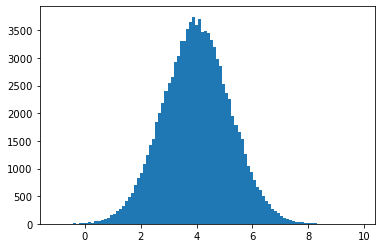

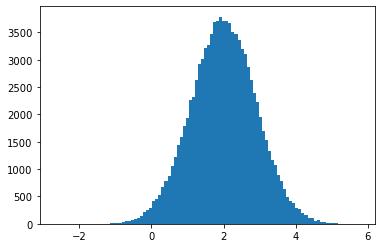

In [12]:
X = []
Y = []
for item in v:
    X.append(item[0])
    Y.append(item[1])

nbins = int(100)
nx, binsx, _ = plt.hist(X,bins=nbins)
plt.show()

ny, binsy, _ = plt.hist(Y,bins=nbins)
plt.show()

In [13]:
bin_width_x = (binsx[-1]-binsx[0])/nbins
print(bin_width_x)
I = bin_width_x * sum(nx[0:99])
print(I)
alpha = 0.95*I

bin_mean_x = int((mu[0]-binsx[0])/bin_width_x)
print(bin_mean_x)
bin1 = bin_mean_x-1
bin2 = bin_mean_x+1
I=0
while(I<alpha): 
    I=0
    I = bin_width_x * sum(nx[bin1:bin2])
    bin1 -= 1
    bin2 += 1


print(I)
print(bin1,bin2)
print(binsx[0]+bin1*bin_width_x,binsx[0]+bin2*bin_width_x)

0.10901793989451453
10901.684971511559
46
10397.258963619639
23 69
1.4344395864137267 6.449264821561394


In [14]:
bin_width_y = (binsy[-1]-binsy[0])/nbins
print(bin_width_y)
Iy = bin_width_y * sum(ny[0:99])
print(Iy)
alpha = 0.95*Iy

bin_mean_y = int((mu[1]-binsy[0])/bin_width_y)
print(bin_mean_y)
bin1 = bin_mean_y-1
bin2 = bin_mean_y+1
Iy=0
while(Iy<alpha): 
    Iy=0
    Iy = bin_width_y * sum(ny[bin1:bin2])
    bin1 -= 1
    bin2 += 1


print(Iy)
print(bin1,bin2)
print(bin1*bin_width_y,bin2*bin_width_y)

0.08440217213152199
8440.048408807936
55
8026.477765363477
33 77
2.7852716803402253 6.498967254127193


Now we try out the Metropoli-Hastings method to sample the BVN. We need to define a new distribution Q, possibly symmetric like a MVN, and draw from it. An acceptance step is then considered, to check whether or not the next sample is validated.

In [46]:
#define Q
def gauss_2d(mean, sigmax, sigmay):
    a = np.random.normal(loc=mean[0], scale=sigmax, size=1)
    b = np.random.normal(loc=mean[1], scale=sigmay, size=1)
    return list(map(list, zip(a, b)))[0]

#define acceptance rate
def acceptance(next, curr):
    prob_next = mvn.pdf(next,mu,cov)
    prob_curr = mvn.pdf(curr,mu,cov)
    alpha = min(prob_next/prob_curr,1)
    return alpha

def random_coin(p):
    k = np.random.uniform(0,1)
    if k>=p:
        return False
    else:
        return True

N=int(1e4)
r = mu
fin = []
Tr = 0.
trace = []
while(len(fin)<N):
    fin.append(r)
    rplus = gauss_2d(r,1.5,1.0)
    Tr -= np.log(mvn.pdf(rplus,mu,cov))/len(fin)
    trace.append(Tr)
    alpha = acceptance(rplus,r)
    bool = random_coin(alpha)
    if(bool):
        r = rplus

        

fin = np.array(fin)
#burnin = int(0.2*len(fin))
#fin = fin[burnin:]

print(len(fin))
#print(fin)

10000


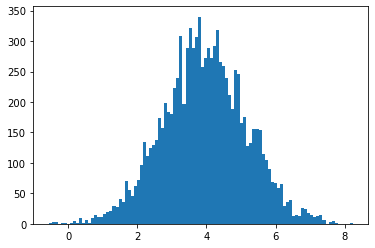

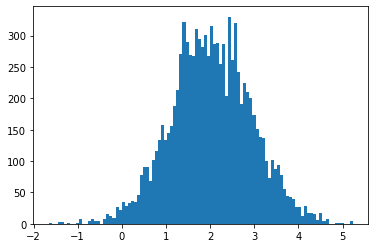

In [47]:
xtry = []
for i in range(int(len(fin))):
    xtry.append(fin[i][0])
ytry = []
for i in range(int(len(fin))):
    ytry.append(fin[i][1])

plt.hist(xtry,bins=100)
plt.show()


plt.hist(ytry,bins=100)
plt.show()

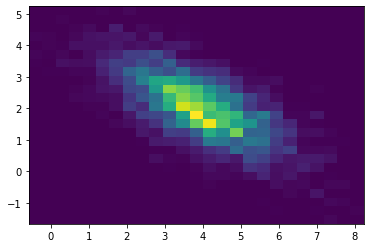

In [48]:
plt.hist2d(xtry,ytry,bins=(25,25))

plt.tight_layout
plt.show()

In [49]:
#another chain
r = (3.,3.)
fin2 = []
Tr = 0.
trace2 = []
while(len(fin2)<N):
    fin2.append(r)
    Tr -= np.log(mvn.pdf(rplus,mu,cov))/len(fin2)
    trace2.append(Tr)
    rplus = gauss_2d(r,1.5,1.0)
    alpha = acceptance(rplus,r)
    bool = random_coin(alpha)
    if(bool):
        r = rplus

        

fin2 = np.array(fin2)
print(len(fin2))

10000


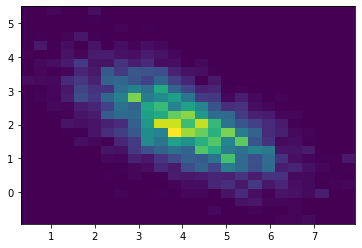

In [50]:
xtry2 = []
for i in range(int(len(fin2))):
    xtry2.append(fin2[i][0])
ytry2 = []
for i in range(int(len(fin2))):
    ytry2.append(fin2[i][1])

plt.hist2d(xtry2,ytry2,bins=(25,25))

plt.tight_layout
plt.show()

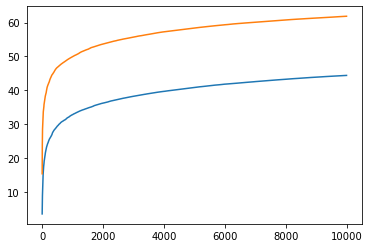

In [51]:
mvec = np.linspace(1,len(fin),len(fin))
plt.plot(mvec, trace)
plt.plot(mvec, trace2)
plt.show()

The second chain, despite converging a little faster, is probably affected by bad mixing, since it's only sampling a region of the original MVN. Let's try to define another couple of chains, and after checking mixing and converging, estimate the variance of the original MVN.

In [52]:
#another chain
r = (0.,0.)
fin3 = []
Tr = 0.
trace3 = []
while(len(fin3)<N):
    fin3.append(r)
    Tr -= np.log(mvn.pdf(rplus,mu,cov))/len(fin3)
    trace3.append(Tr)
    rplus = gauss_2d(r,1.5,1.0)
    alpha = acceptance(rplus,r)
    bool = random_coin(alpha)
    if(bool):
        r = rplus

        

fin3 = np.array(fin3)
print(len(fin3))

#another chain
r = (5.,1.)
fin4 = []
Tr = 0.
trace4 = []
while(len(fin4)<N):
    fin4.append(r)
    Tr -= np.log(mvn.pdf(rplus,mu,cov))/len(fin4)
    trace4.append(Tr)
    rplus = gauss_2d(r,1.5,1.0)
    alpha = acceptance(rplus,r)
    bool = random_coin(alpha)
    if(bool):
        r = rplus

        

fin4 = np.array(fin4)
print(len(fin4))

10000
10000


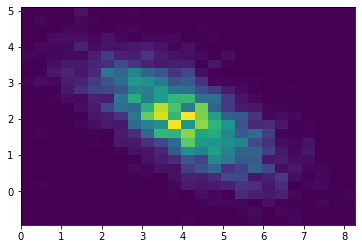

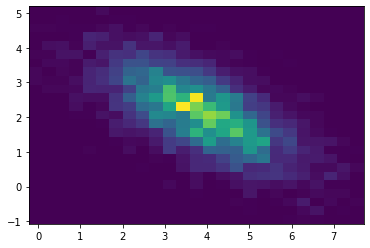

In [53]:
xtry3 = []
for i in range(int(len(fin3))):
    xtry3.append(fin3[i][0])
ytry3 = []
for i in range(int(len(fin3))):
    ytry3.append(fin3[i][1])

plt.hist2d(xtry3,ytry3,bins=(25,25))

plt.tight_layout
plt.show()

xtry4 = []
for i in range(int(len(fin4))):
    xtry4.append(fin4[i][0])
ytry4 = []
for i in range(int(len(fin4))):
    ytry4.append(fin4[i][1])

plt.hist2d(xtry4,ytry4,bins=(25,25))


plt.tight_layout
plt.show()

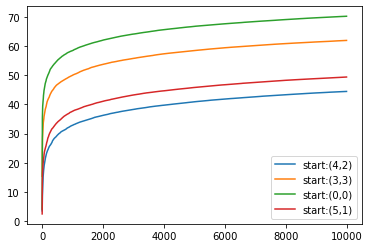

In [54]:
mvec = np.linspace(1,len(fin),len(fin))
plt.plot(mvec, trace, label="start:(4,2)")
plt.plot(mvec, trace2, label="start:(3,3)")
plt.plot(mvec, trace3, label="start:(0,0)")
plt.plot(mvec, trace4, label="start:(5,1)")
plt.legend()
plt.show()

Let's perform the Gelman-Rubin test for the variance

In [55]:
av = sum(fin)/int(len(fin))
av2 = sum(fin2)/int(len(fin2))
av3 = sum(fin3)/int(len(fin3))
av4 = sum(fin4)/int(len(fin4))
av_tot = sum

av_theta = np.array([av,av2,av3,av4])   # array of the averages, each component is the mean of a chain
#print(av_theta)

av_tot = sum(av_theta)/4
print(av_tot)

[3.94540044 2.0490883 ]


In [56]:
def chain_var(vec,mean):
    s = 0.
    for i in range(int(len(vec))):
        s += np.outer(vec[i]-av,vec[i]-av)
    s /= (len(fin)-1)
    return s

var = np.array([chain_var(fin,av),chain_var(fin2,av2),chain_var(fin3,av3),chain_var(fin4,av4)])
av_var = sum(var)/4
print(av_var)





[[ 1.43204282 -0.7149223 ]
 [-0.7149223   0.82226496]]


In [57]:
z = 0.
for j in range(4):
    z += np.outer(av_theta[j]-av_tot,av_theta[j]-av_tot)

z /= 3.
print(z)

[[ 0.00668294 -0.00474782]
 [-0.00474782  0.00362347]]


In [58]:
final_var = (len(fin)-1)/len(fin)*av_var + z
print(final_var)

[[ 1.43858255 -0.71959862]
 [-0.71959862  0.8258062 ]]


In [59]:
#Gelman Rubin test
R = final_var/av_var 
print(R)

[[1.00456672 1.00654103]
 [1.00654103 1.00430669]]


We now try to sample the Gaussian distribution by using GIbbs sampling. It's basically a MH, but the movement probabilities now change. We choose a component of the starting point (x,y) and fix it, then evolve the other component by sampling from the conditioned probability, given that the other is fixed. 

In [76]:
prec = np.array([[cov[1,1]/det, -cov[0,1]/det],[-cov[0,1]/det, cov[0,0]/det]])
prec = np.linalg.inv(cov)

def MVN(r):
    c = 1./(2*np.pi)*1./np.sqrt(det)*np.e**(-0.5*np.dot((r-mu), np.dot(prec, (r-mu))))
    return c

print(MVN([4,2]))
print(mvn.pdf([4,2], mu, cov))

0.19391900846025578
0.19391900846025575


In [95]:
r = [4.,2.]
N=int(1e4)
fin = []
Tr = 0.
trace = []
prec = np.linalg.inv(cov)
while(len(fin)<N):
    fin.append(r)
    k = int(np.random.uniform(0.,1.)+0.5)
    l = int(abs(k-1))
    sigma = 1./np.sqrt(prec[k,k])
    mean = mu[k]-prec[k,l]/prec[k,k]*(r[l]-mu[l])
    q = np.random.normal(mean,sigma)
    rplus = np.zeros(2,float)
    rplus[k] = q
    rplus[l] = r[l]
    r = rplus
    Tr -= np.log(mvn.pdf(r,mu,cov))/len(fin)
    trace.append(Tr)

        

fin = np.array(fin)
#burnin = int(0.2*len(fin))
#fin = fin[burnin:]
#print(fin)

print(len(fin))


10000


In [100]:
r = [3.,3.]
fin2 = []
Tr = 0.
trace2 = []
prec = np.linalg.inv(cov)
while(len(fin2)<N):
    fin2.append(r)
    k = int(np.random.uniform(0.,1.)+0.5)
    l = int(abs(k-1))
    sigma = 1./np.sqrt(prec[k,k])
    mean = mu[k]-prec[k,l]/prec[k,k]*(r[l]-mu[l])
    q = np.random.normal(mean,sigma)
    rplus = np.zeros(2,float)
    rplus[k] = q
    rplus[l] = r[l]
    r = rplus
    Tr -= np.log(mvn.pdf(r,mu,cov))/len(fin2)
    trace2.append(Tr)

        

fin2 = np.array(fin2)

r = [0.,0.]
fin3 = []
Tr = 0.
trace3 = []
prec = np.linalg.inv(cov)
while(len(fin3)<N):
    fin3.append(r)
    k = int(np.random.uniform(0.,1.)+0.5)
    l = int(abs(k-1))
    sigma = 1./np.sqrt(prec[k,k])
    mean = mu[k]-prec[k,l]/prec[k,k]*(r[l]-mu[l])
    q = np.random.normal(mean,sigma)
    rplus = np.zeros(2,float)
    rplus[k] = q
    rplus[l] = r[l]
    r = rplus
    Tr -= np.log(mvn.pdf(r,mu,cov))/len(fin3)
    trace3.append(Tr)

        

fin3 = np.array(fin3)


r = [1.,5.]
fin4 = []
Tr = 0.
trace4 = []
prec = np.linalg.inv(cov)
while(len(fin4)<N):
    fin4.append(r)
    k = int(np.random.uniform(0.,1.)+0.5)
    l = int(abs(k-1))
    sigma = 1./np.sqrt(prec[k,k])
    mean = mu[k]-prec[k,l]/prec[k,k]*(r[l]-mu[l])
    q = np.random.normal(mean,sigma)
    rplus = np.zeros(2,float)
    rplus[k] = q
    rplus[l] = r[l]
    r = rplus
    Tr -= np.log(mvn.pdf(r,mu,cov))/len(fin4)
    trace4.append(Tr)

        

fin4 = np.array(fin4)


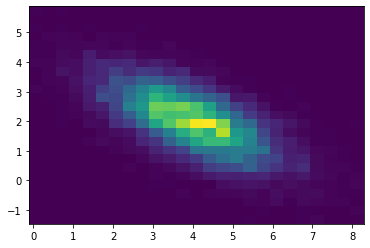

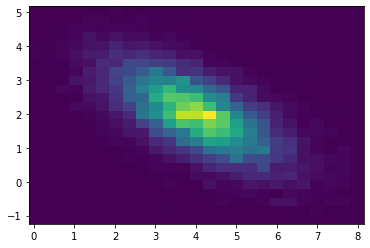

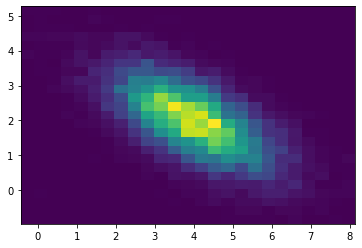

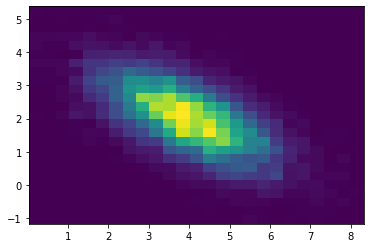

In [101]:
xtry = []
for i in range(int(len(fin))):
    xtry.append(fin[i][0])
ytry = []
for i in range(int(len(fin))):
    ytry.append(fin[i][1])

plt.hist2d(xtry,ytry,bins=(25,25))


plt.tight_layout
plt.show()

xtry2 = []
for i in range(int(len(fin2))):
    xtry2.append(fin2[i][0])
ytry2 = []
for i in range(int(len(fin2))):
    ytry2.append(fin2[i][1])

plt.hist2d(xtry2,ytry2,bins=(25,25))


plt.tight_layout
plt.show()

xtry3 = []
for i in range(int(len(fin3))):
    xtry3.append(fin3[i][0])
ytry3 = []
for i in range(int(len(fin3))):
    ytry3.append(fin3[i][1])

plt.hist2d(xtry3,ytry3,bins=(25,25))


plt.tight_layout
plt.show()

xtry4 = []
for i in range(int(len(fin4))):
    xtry4.append(fin4[i][0])
ytry4 = []
for i in range(int(len(fin4))):
    ytry4.append(fin4[i][1])

plt.hist2d(xtry4,ytry4,bins=(25,25))


plt.tight_layout
plt.show()

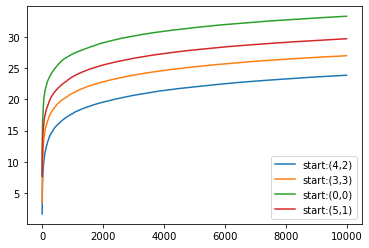

In [102]:
mvec = np.linspace(1,len(fin),len(fin))
plt.plot(mvec, trace, label="start:(4,2)")
plt.plot(mvec, trace2, label="start:(3,3)")
plt.plot(mvec, trace3, label="start:(0,0)")
plt.plot(mvec, trace4, label="start:(5,1)")
plt.legend()
plt.show()

In [103]:
av = sum(fin)/int(len(fin))
av2 = sum(fin2)/int(len(fin2))
av3 = sum(fin3)/int(len(fin3))
av4 = sum(fin4)/int(len(fin4))
av_tot = sum

av_theta = np.array([av,av2,av3,av4])   # array of the averages, each component is the mean of a chain
#print(av_theta)

av_tot = sum(av_theta)/4
print(av_tot)

def chain_var(vec,mean):
    s = 0.
    for i in range(int(len(vec))):
        s += np.outer(vec[i]-av,vec[i]-av)
    s /= (len(fin)-1)
    return s

var = np.array([chain_var(fin,av),chain_var(fin2,av2),chain_var(fin3,av3),chain_var(fin4,av4)])
av_var = sum(var)/4
print(av_var)

z = 0.
for j in range(4):
    z += np.outer(av_theta[j]-av_tot,av_theta[j]-av_tot)

z /= 3.
print(z)

final_var = (len(fin)-1)/len(fin)*av_var + z
print(final_var)

#Gelman Rubin test
R = final_var/av_var 
print(R)

[3.98520417 2.00742852]
[[ 1.41595399 -0.68799976]
 [-0.68799976  0.79999874]]
[[ 0.00025202 -0.00022511]
 [-0.00022511  0.0002106 ]]
[[ 1.41606441 -0.68815607]
 [-0.68815607  0.80012934]]
[[1.00007798 1.00022719]
 [1.00022719 1.00016326]]
